In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sinh, cosh

In [2]:
# Initial matrixes A x = f:
# a -> A
# b -> f

matrix_a = [
    [4.0, 1.0, 0.0, 0.0],
    [1.0, 4.0, 1.0, 0.0],
    [0.0, 1.0, 4.0, 1.0],
    [0.0, 0.0, 1.0, 4.0]
]
matrix_a = np.array(matrix_a)

In [3]:
matrix_b = [6.0, 12.0, 18.0, 19.0]
matrix_b = np.array(matrix_b)

In [4]:
# The solution using the python function
np.linalg.solve(matrix_a, matrix_b)

array([1., 2., 3., 4.])

In [2]:
# Function to find the coefficients of a linear system of the form A x = f.
# Where A is a tridiagonal matrix, f is a vector with the function values,
# and x is a vector which we want to find its components to solve the system.

def solution_coefficients(matrix_A, vector_f):
    matrix = matrix_A.copy()
    vector = vector_f.copy()
    
    for i in range(1, np.shape(matrix)[0]):
        vector[i] = vector[i] - (matrix[i, i-1] / matrix[i-1, i-1]) * vector[i-1]
        matrix[i] = matrix[i] - (matrix[i, i-1] / matrix[i-1, i-1]) * matrix[i-1]
    
    coefficients = np.array([vector[-1] / matrix[-1, -1]])
    
    for i in range(np.shape(matrix)[0] - 2, -1, -1):
        x = (vector[i] - matrix[i, i+1] * coefficients[0]) / matrix[i, i]
        coefficients = np.insert(coefficients, 0, x)
        
    return coefficients

In [6]:
# The order of the coefficients is as follows:
# sol = {sol_0, sol_1, sol_2, ... , sol_n}

solution_coefficients(matrix_a, matrix_b)

array([1., 2., 3., 4.])

Now, I shall generate the matrix to find the $z_{i}$ coefficients for the tension spline. With the funciton defined above *solution_coefficients* I can solve the resulting system of equations.

In [3]:
nodes_x = [0.0, 1.0, 1.8, 5.1, 8.3, 9.7, 11.0, 14.5, 18.0, 19.2, 20.4, 23.6, 25.0]
nodes_y = [1.3, 1.35, 2.9, 3.4, 3.8, 5.6, 7.2, 7.2, 7.2, 5.9, 4.6, 4.6, 0.0]
tau = 4.0

In [4]:
# MUST CHECK THE DEFINITION for h here. There is something odd with the indexes. 
def h(i):
    return nodes_x[i+1] - nodes_x[i]

In [5]:
def alpha(i):
    return (1 / h(i)) - (tau / sinh(tau * h(i)))

In [6]:
def beta(i):
    return (tau * cosh(tau * h(i)) / sinh(tau * h(i))) - (1 / h(i))

In [7]:
def gamma(i):
    return tau**2 * (nodes_y[i+1] - nodes_y[i]) / h(i)

In [77]:
# alpha(i-1) z(i-1) + (beta(i-1) + beta(i)) z(i) + alpha(i) z(i+1) = gamma(i) - gamma(i-1)
def system_of_equations(nodes):
    matrix_alpha_beta = np.zeros((len(nodes) - 2, len(nodes)))
    column_vector_gamma = []
    
    # Generatingthe system of equations by row
    for i in range(1, len(nodes)-1):
        matrix_alpha_beta[i-1, i-1] = alpha(i-1)
        matrix_alpha_beta[i-1, i] = (beta(i-1) + beta(i))
        matrix_alpha_beta[i-1, i+1] = alpha(i)
        
        vector_element = (gamma(i) - gamma(i-1))         
        column_vector_gamma.append(vector_element)

    column_vector_gamma = np.array(column_vector_gamma)
    matrix_alpha_beta = matrix_alpha_beta[:,1:-1]
    
    return matrix_alpha_beta, column_vector_gamma; 

In [78]:
matrix_alff, ganna = system_of_equations(nodes_x)

In [80]:
ganna

array([ 3.02000000e+01, -2.85757576e+01, -4.24242424e-01,  1.85714286e+01,
       -8.79120879e-01, -1.96923077e+01,  0.00000000e+00, -1.73333333e+01,
       -1.06581410e-14,  1.73333333e+01, -5.25714286e+01])

In [8]:
matrix_z = []
vector_gamma = []

for i in range(1, len(nodes_x)-1):
    # vector_element = tau**2 * (nodes_y[i+1] - nodes_y[i]) / h(i)
    vector_element = (gamma(i) - gamma(i-1)) 
    row = np.array([alpha(i-1), (beta(i-1) + beta(i)), alpha(i)])
    vector_gamma.append(vector_element)
    matrix_z.append(row)

vector_gamma = np.array(vector_gamma)    
matrix_z = np.array(matrix_z)


matrix_z[0, 0] = 0
matrix_z[-1, -1] = 0

In [13]:
matrix_z

array([[0.        , 5.76599918, 0.92335964],
       [0.92335964, 6.46028428, 0.3030155 ],
       [0.3030155 , 7.3844697 , 0.31247791],
       [0.31247791, 6.97332368, 0.6847024 ],
       [0.6847024 , 6.51683638, 0.72509691],
       [0.72509691, 6.94529841, 0.28570763],
       [0.28570763, 7.42857143, 0.28570763],
       [0.28570763, 6.88149425, 0.7674909 ],
       [0.7674909 , 6.33441707, 0.7674909 ],
       [0.7674909 , 6.85470853, 0.31247791],
       [0.31247791, 6.97332368, 0.        ]])

In [14]:
vector_gamma

array([ 3.02000000e+01, -2.85757576e+01, -4.24242424e-01,  1.85714286e+01,
       -8.79120879e-01, -1.96923077e+01,  0.00000000e+00, -1.73333333e+01,
       -1.06581410e-14,  1.73333333e+01, -5.25714286e+01])

In [9]:
test_matrix = np.zeros((len(nodes_x) - 2, len(nodes_x)))

for i in range(1, len(nodes_x)-1):
    test_matrix[i-1, i-1] = alpha(i-1)
    test_matrix[i-1, i] = (beta(i-1) + beta(i))
    test_matrix[i-1, i+1] = alpha(i)

test_matrix = test_matrix[:,1:-1]

In [16]:
test_matrix

array([[5.76599918, 0.92335964, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.92335964, 6.46028428, 0.3030155 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.3030155 , 7.3844697 , 0.31247791, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.31247791, 6.97332368, 0.6847024 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.6847024 , 6.51683638,
        0.72509691, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.72509691,
        6.94529841, 0.28570763, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [64]:
coefficients_z = solution_coefficients(test_matrix, vector_gamma)
coefficients_z

array([ 6.08558247, -5.29529705,  0.04681434,  2.67095864, -0.10027571,
       -2.83334852,  0.20598984, -2.52251209, -0.04369271,  2.88312592,
       -7.66812846])

In [65]:
np.linalg.solve(test_matrix, vector_gamma)

array([ 6.08558247, -5.29529705,  0.04681434,  2.67095864, -0.10027571,
       -2.83334852,  0.20598984, -2.52251209, -0.04369271,  2.88312592,
       -7.66812846])

In [66]:
coefficients_z = np.insert(coefficients_z, 0, 0)
coefficients_z = np.append(coefficients_z, 0)

In [67]:
coefficients_z

array([ 0.        ,  6.08558247, -5.29529705,  0.04681434,  2.67095864,
       -0.10027571, -2.83334852,  0.20598984, -2.52251209, -0.04369271,
        2.88312592, -7.66812846,  0.        ])

In [68]:
def interpolation_function(i, x):    
    solution = ((coefficients_z[i] * sinh(tau * (nodes_x[i+1] - x))
                + coefficients_z[i+1] * sinh(tau * (x - nodes_x[i]))) / (tau**2 * sinh(tau * h(i))) 
                + (nodes_y[i] - coefficients_z[i] / tau**2) * (nodes_x[i+1] - x) / h(i) 
                + (nodes_y[i+1] - coefficients_z[i+1] / tau**2) * (x - nodes_x[i]) / h(i))
    return solution

In [70]:
interval_x1 = np.arange(nodes_x[0], nodes_x[1], 0.1)
interpolated_y1 = interpolation_function(0, interval_x1)
interpolated_y1

array([1.3       , 1.27268991, 1.24630806, 1.22193321, 1.20096954,
       1.18537434, 1.17797536, 1.18292933, 1.20639595, 1.25753663])

In [71]:
interval_x2 = np.arange(nodes_x[1], nodes_x[2], 0.1)
interpolated_y2 = interpolation_function(1, interval_x2)
interpolated_y2

array([1.35      , 1.49564873, 1.68075287, 1.88949374, 2.10988525,
       2.33183038, 2.54548402, 2.73965665])

In [73]:
interval_x3 = np.arange(nodes_x[2], nodes_x[3], 0.1)
interpolated_y3 = interpolation_function(2, interval_x3)
interpolated_y3

array([2.9       , 3.01414346, 3.09231569, 3.14637567, 3.18427273,
       3.21133547, 3.23113575, 3.24606785, 3.25773674, 3.26721823,
       3.27523349, 3.28226593, 3.2886396 , 3.29457175, 3.30020802,
       3.30564609, 3.3109515 , 3.31616828, 3.32132607, 3.32644498,
       3.33153879, 3.33661721, 3.34168747, 3.34675547, 3.35182673,
       3.35690733, 3.36200483, 3.36712956, 3.37229624, 3.3775264 ,
       3.38285188, 3.38831995, 3.39400101])

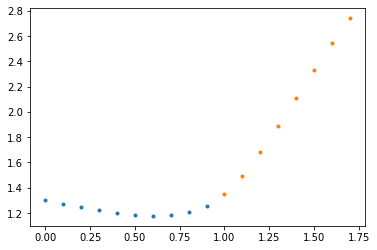

In [74]:
plt.plot(interval_x1, interpolated_y1, '.')
plt.plot(interval_x2, interpolated_y2, '.')

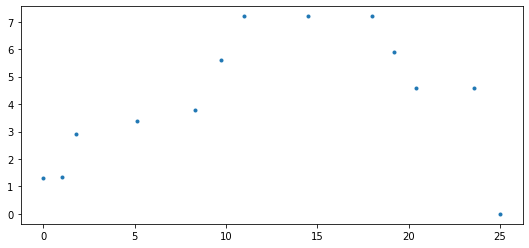

In [26]:
plt.figure(figsize=(9,4))
plt.plot(nodes_x, nodes_y, '.')

In [27]:
nodes_y[2]

2.9